In [1]:
import numpy as np
data = np.load('fashion_mnist.npz')
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=2,
    verbose=1,
    monitor='val_accuracy',
    restore_best_weights=True
)
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9477 - loss: 0.1431 - val_accuracy: 0.9114 - val_loss: 0.2511
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9552 - loss: 0.1222 - val_accuracy: 0.9096 - val_loss: 0.2837
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9591 - loss: 0.1119 - val_accuracy: 0.9106 - val_loss: 0.2885
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [5]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


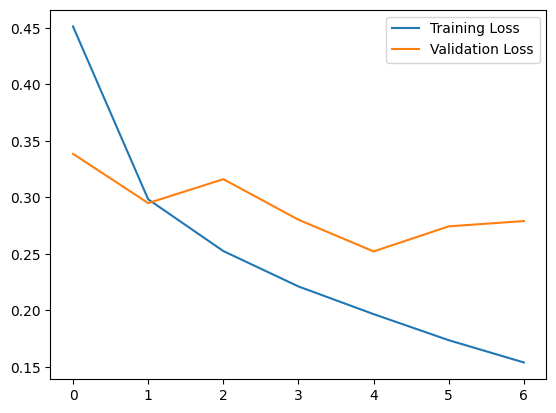

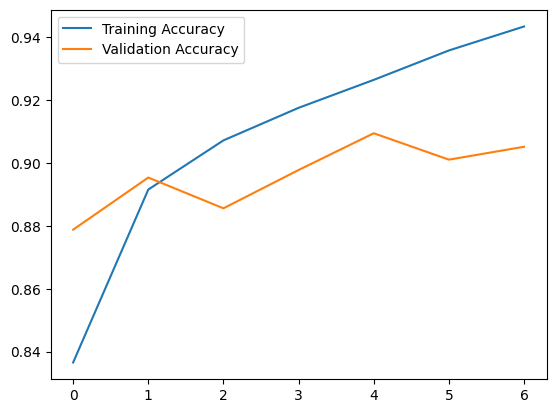

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.82      0.91      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.96      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



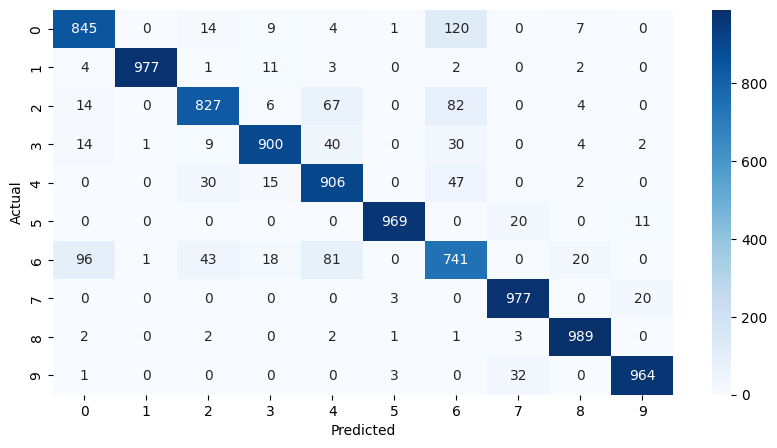

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

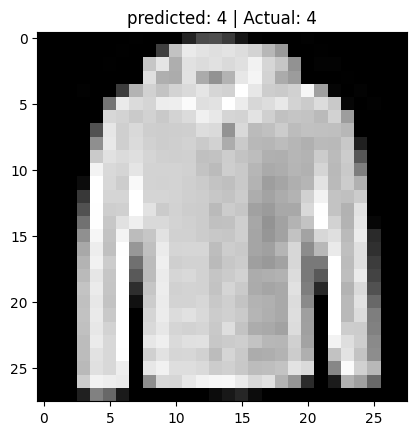

In [9]:
def display_image(index):
    plt.imshow(x_test[index],cmap='gray')
    plt.title(f"predicted: {y_pred[index]} | Actual: {y_test[index]}")
    plt.show()

import random
index = random.randint(0,len(x_test))
display_image(index)